In [1]:
import cv2
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    #axs.axis('off')
    plt.plot()

In [3]:
def make_step(k,m,a):
      for i in range(len(m)):
        for j in range(len(m[i])):
              if m[i][j] == k:
                if i>0 and m[i-1][j] == 0 and a[i-1][j] == 0:
                    m[i-1][j] = k + 1
                if j>0 and m[i][j-1] == 0 and a[i][j-1] == 0:
                    m[i][j-1] = k + 1
                if i<len(m)-1 and m[i+1][j] == 0 and a[i+1][j] == 0:
                    m[i+1][j] = k + 1
                if j<len(m[i])-1 and m[i][j+1] == 0 and a[i][j+1] == 0:
                    m[i][j+1] = k + 1

def find_start_finish(v: np.ndarray):
    count = 0
    while(v[0][count]!=0):
        count+=1
    s1=count
    while v[0][count]!=1:
        count+=1
    mid=(count-s1-1)//2
    start=(0, s1+mid)
    
    count = 0
    while (v[v.shape[0]-1][count]!=0):
        count+=1
    s1=count
    while (v[v.shape[0]-1][count]!=1):
        count+=1
    mid=(count-s1-1)//2
    finish=(v.shape[0]-1, s1+mid)
    return(start,finish)
    
def find_way_from_maze(a: np.ndarray, m: np.ndarray): 
    """
    Найти путь через лабиринт.

    :param image: изображение лабиринта
    :return: координаты пути из лабиринта в виде (x, y), где x и y - это массивы координат
    """
    
    cord = find_start_finish(a)
    i,j = cord[0]
    m[i][j] = 1

    k = 0
    while m[cord[1][0]][cord[1][1]] == 0:
        k += 1
        make_step(k,m,a)

    i, j = cord[1]
    k = m[i][j]
    coords = [(i,j)]
    while k > 1:
        if i > 0 and m[i - 1][j] == k-1:
            i, j = i-1, j
            coords.append((i, j))
            k-=1
        elif j > 0 and m[i][j - 1] == k-1:
            i, j = i, j-1
            coords.append((i, j))
            k-=1
        elif i < len(m) - 1 and m[i + 1][j] == k-1:
            i, j = i+1, j
            coords.append((i, j))
            k-=1
        elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
            i, j = i, j+1
            coords.append((i, j))
            k -= 1

    return coords

In [4]:
def plot_maze_path(image: np.ndarray, coords: list) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.
     
    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    #if coords:
    #    x, y = coords
    #    img_wpath[x, y, :] = [0, 0, 255]

    for i in range(len(coords)):
        img_wpath[coords[i][0], coords[i][1], :] = [0, 0, 255]
    return img_wpath

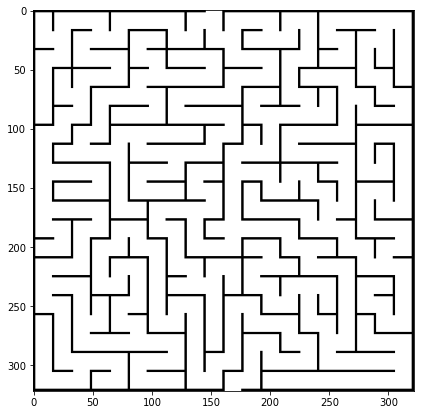

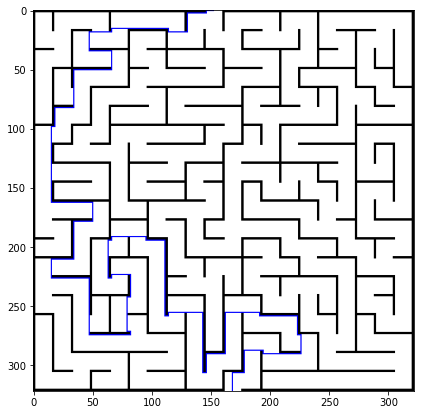

In [6]:
test_image = cv2.imread('...')  # загрузить тестовую картинку
plot_one_image(test_image)

gray_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
a = np.array(gray_image)//255
a[a>0]=2
a[a==0]=1
a[a==2]=0

m = np.zeros(a.shape, dtype=int)

way_coords = find_way_from_maze(a,m)  # вычислить координаты пути через лабиринт
image_with_way = plot_maze_path(test_image, way_coords)
plot_one_image(image_with_way)